---
title: "Lab-8: Assignment"
author: "Brian Kwon"
format: 
  html: 
    embed-resources: true
---

## Problem-1

_Use R to answer the following questions._

In a certain large city, 34% of the adult population has a college degree. In a random sample of size  800,

a. What is the exact probability that between 250 and 290 adults have a college degree?

Hint: ( _Exact distribution:_ B(800,.34).) 

In [29]:
pbinom(290,800,0.34) - pbinom(249,800,0.34)

[1] 0.8699995

b. What is the approximate normal distribution of the fraction of adults in the sample with a college degree?
_The fraction is a sample mean. What does the Central Limit Theorem say?_ (Answer (i)-(iii) by hand)

* _for each person in the sample the question "Do you have a college degree?" is like a Bernoulli r.v., B(1,p)._

(i). _What is p?_ 

p is $0.34$



(ii). _what are the mean and standard deviation of a single result?_ 

mean: $0.34$\
\
sd: $\sqrt{\frac{0.34(1-0.34)}{1}} = 0.4737$



(iii). _What is the distribution of the sample fraction, that is sample mean?_

Because of central limit theorem, the distribution of the sample fraction is close to normal distribution.

$N(\mu,\sigma^2) = N(0.34,\frac{0.34(1-0.34)}{800}) = N(0.34, 0.0167)$

(iv). What is the probability, if the approximate normal distribution is used? (use R). Compare ther result with the exact value.

* The sample fraction has an approximate normal distribution with mean $p$ and standard deviation $\sqrt{\frac{p(1-p)}{n}}$.

* The sample count (number of adults with college degree in the sample) has an approximate normal distribution with mean $np$ and standard deviation $\sqrt{np(1-p)}$. 


In [30]:
sam = rbinom(100000,800,0.34)

In [31]:
cat("Sample fraction mean from an approximate noraml distribution:", mean(sam/800),"\n")
cat("Exact fraction mean:",0.34,"\n")
cat("Sample fraction standard deviation from an approximate noraml distribution:", sd(sam/800),"\n")
cat("Exact fraction standard deviation:",sqrt(0.34*(1-0.34)/800))

Sample fraction mean from an approximate noraml distribution: 0.3400404 
Exact fraction mean: 0.34 
Sample fraction standard deviation from an approximate noraml distribution: 0.01679176 
Exact fraction standard deviation: 0.01674813

These values are very close to exact value of mean and standard deviation.

In [32]:
cat("Sample count mean from an approximate noraml distribution:", mean(sam),"\n")
cat("Exact count mean:",800*0.34,"\n")
cat("Sample count standard deviation from an approximate noraml distribution:", sd(sam),"\n")
cat("Exact count :",sqrt(800*0.34*(1-0.34)),"\n")

Sample count mean from an approximate noraml distribution: 272.0323 
Exact count mean: 272 
Sample count standard deviation from an approximate noraml distribution: 13.43341 
Exact count : 13.39851 


Again, these values are very close to each other.

# Problem-2

Repeat the Same likelihood example(Example 1) done for Poisson distribution in class for an exponential distribution.

a. Write a function to get the likelihood function for data from exponential distribution.




In [33]:
likelihood = function(lambda,X){
    result = (lambda^length(X))*exp(-lambda*sum(X))
    return(result)
}

b. Generate a random sample of size 5 from an exponential distribution: Let's say the variable named "X.2".




In [34]:
X.2 = rexp(5)

c. Compute the likelihoods(using X.2) for a range of lambda(t) and plot them: Then find for which value the likelihood is maximized?




In [35]:
t = seq(.01,8,by = .01)
y = sapply(t,function(t){likelihood(t,X.2)})

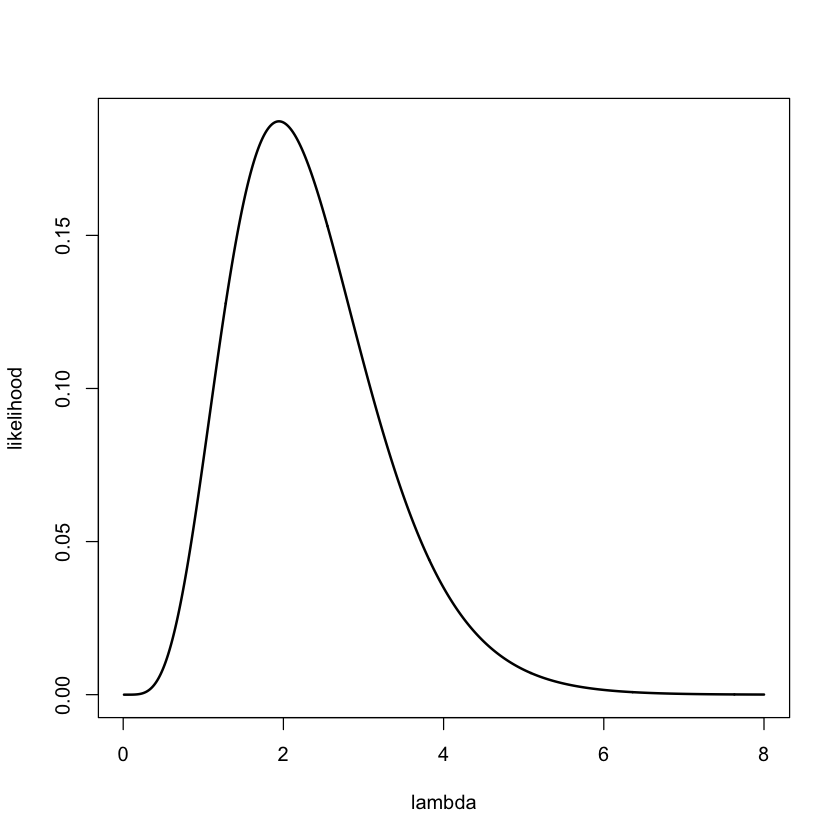

In [36]:
plot(t,y, xlab = 'lambda', ylab = 'likelihood', type = 'l', lwd = 2)

In [37]:
cat("Likelihood is maximized when lambda =",t[which.max(y)])

Likelihood is maximized when lambda = 1.94

d. Plot the same thing for log likelihood: 



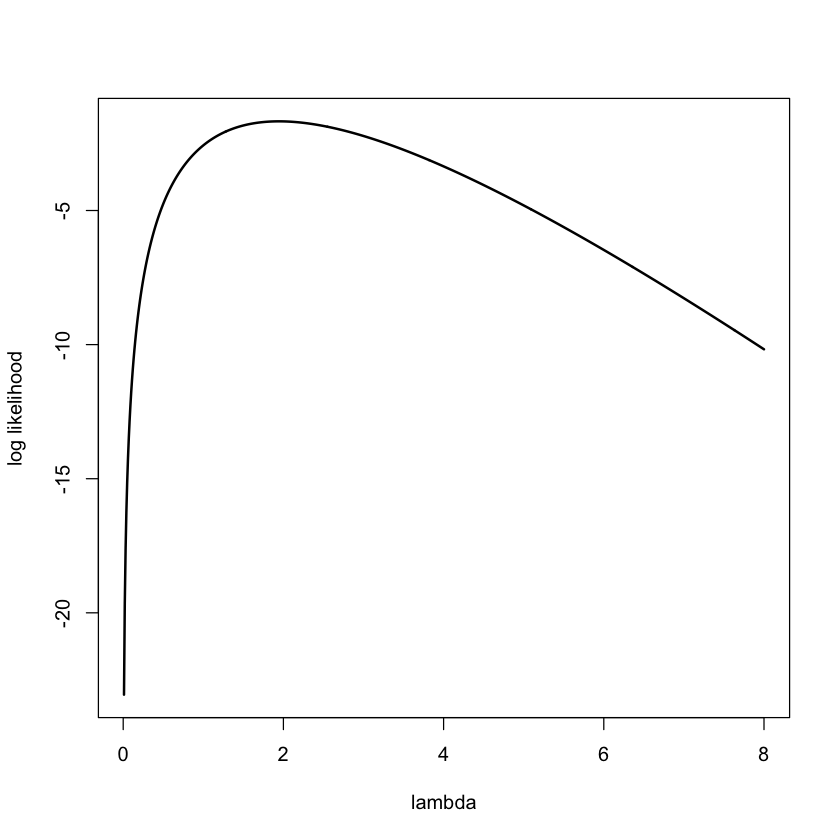

In [38]:
plot(t,log(y), xlab = 'lambda', ylab = 'log likelihood', type = 'l', lwd = 2)

e. Repeat this 10 times

* 10 random samples with the same lambda
* plot each log-likelihood in the same plot
* what can you say about log likelihoods according to the plot?  Does it have to do with the sample size we chose?




In [43]:
X = matrix(rexp(50), nrow = 5)
likelihoods = matrix(NA, nrow = dim(X)[2], ncol = length(t))
for(i in 1:ncol(X)){
    x = X[,i]
    likelihoods[i,] =  sapply(t,function(t){likelihood(t,x)})
}

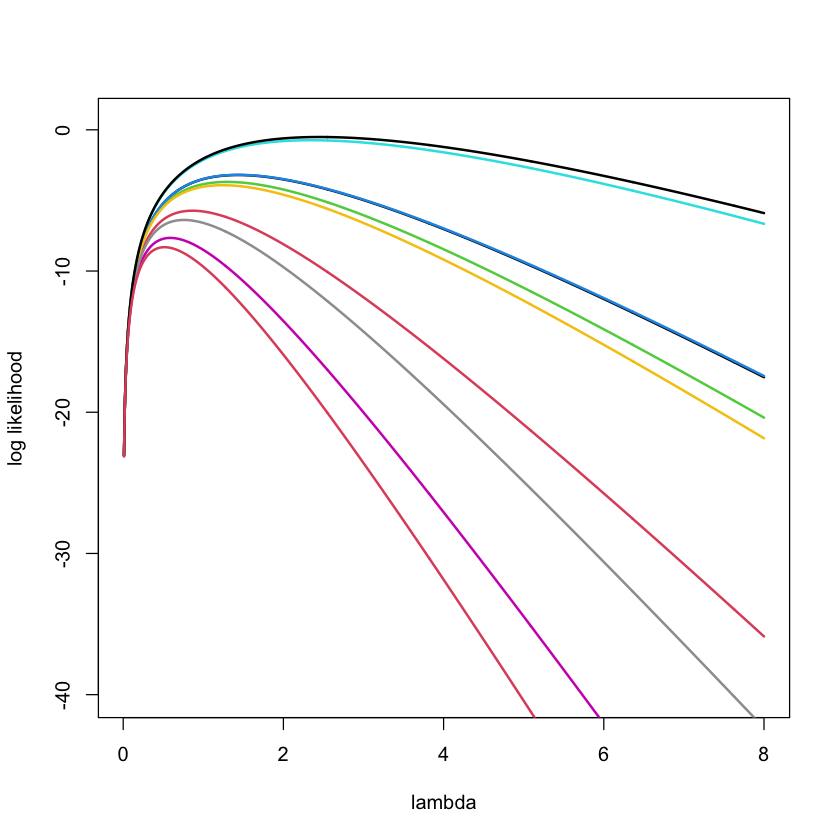

In [44]:
plot(t,log(likelihoods[1,]), xlab = 'lambda', ylab = 'log likelihood', type = 'l', lwd = 2, col = 1,ylim = c(-40,max(likelihoods)))
for (i in 2:10){
   lines(t,log(likelihoods[i,]), lwd = 2, col = i)
}

Regardless of sample size, the lambdas that maximize the likelihood are similar across the samples. If we have large enough sample size, the plots will be in similar shape.

# Problem-3: Optional 

`Don't need to submit anything for this one`

Consider the probability distribution with density
$$
f(x|\theta) = \begin{cases}
\theta x^{\theta - 1} \quad (0 \le x \le 1) \\
0 \quad \text{otherwise}
\end{cases}
$$
where $\theta > 0$ is unknown. 

Find a formula for the method-of-moments estimate for $\theta$.
